<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DCCleaningData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [300]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCCleaningData/")
os.getcwd()

'/content/gdrive/My Drive/DCCleaningData'

# Exploring data

### Diagnosing Data for Cleaning

In [0]:
#inconsistent column names, missing data, outliers, duplicate rows, untidy, need to process columns, column types signal unexpected values
import pandas as pd
# df.shape, df.columns, df.head(), df.tail(), spaces in columns names, NaN values, column/row values in other language, df.info()

In [4]:
df = pd.read_csv('airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [5]:
df.shape

(153, 6)

In [6]:
df.info() # can see max number of rows that will result in a df with no NaN's, 116

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [0]:
# look for columns that have numeric data to be stored as objects(stored as string) to correct them

In [8]:
df = pd.read_csv('dob_job_application_filings_subset.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,...,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,X,,,,,,,,,,,,DOUGLAS,MASS,PE,0058375,NaN,...,04/25/2013,NaN,NaN,NaN,$75000.00,$986.00,STANDARD,0,0,NaN,NaN,0,0,0,0,0,0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAMES,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,PRE-FILING,04/25/2013,1-2-3 FAMILY,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,BPP,STEVEN,SAVINO,RA,0025259,NaN,...,NaN,NaN,NaN,NaN,$0.00,$1144.00,STANDARD,0,0,NaN,NaN,0,143,0,0,0,0,,,,,NaN,R2,NaN,NaN,NaN,NaN,NaN,NaN,DAVID,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,PERMIT ISSUED - PARTIAL JOB,04/25/2013,OTHER,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,,,,X,GEN. CONSTR.,ASHRAF,ALI,PE,0084178,Y,...,04/25/2013,NaN,04/25/2013,NaN,$30000.00,$522.50,STANDARD,0,0,NaN,NaN,0,0,5,5,54,54,20,20,RES,RES,NOT APPLICABLE,R7-2,NaN,NaN,NaN,NaN,NaN,NaN,JEREMIE,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,STRUCTURAL,J. BUTCH,MACUTAY JR.,PE,0078226,NaN,...,04/25/2013,NaN,NaN,NaN,$1500.00,$225.00,STANDARD,0,0,NaN,NaN,0,0,12,12,120,120,,,E,E,NOT APPLICABLE,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,CARMINE,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,GEN. CONSTR.,JUNHUI,JIA,PE,0086781,NaN,...,04/25/2013,NaN,NaN,NaN,$19500.00,$389.50,STANDARD,0,0,NaN,NaN,0,0,6,6,64,64,,,COM,COM,NaN,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,HYUNG RO,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [9]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [10]:
df.tail()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,...,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,APPLICATION PROCESSED - ENTIRE,06/12/2013,1-2-3 FAMILY,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,X,,,X,GEN. CONSTR.,ALPHONSE,CALVANICO,PE,0036247,Y,...,06/12/2013,NaN,NaN,NaN,$30700.00,$448.62,STANDARD,1490,1782,Y,NaN,206,0,1,1,10,10,1,1,J-3,J-3,ON-SITE,R1-2,NaN,NaN,SRD,NaN,NaN,NaN,GENO,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,APPLICATION PROCESSED - ENTIRE,06/12/2013,OTHER,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,,,,X,GEN. CONSTR.,VLADIMIR,LUKYANOV-CHERNY,RA,0033073,NaN,...,06/12/2013,NaN,NaN,NaN,$62000.00,$852.10,STANDARD,0,0,NaN,NaN,0,0,5,5,55,55,9,9,RES,RES,NOT APPLICABLE,R8,NaN,NaN,CL,NaN,NaN,NaN,STEVEN,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,PRE-FILING,06/12/2013,OTHER,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,X,,,,,,,,X,MINOR PATCHWORK,LAWRENCE,GUTHARTZ,RA,0018233,Y,...,NaN,NaN,NaN,NaN,$166000.00,$1923.30,STANDARD,0,0,NaN,NaN,0,0,6,6,64,64,40,40,R-2,R-2,NOT APPLICABLE,R7A,NaN,NaN,NaN,NaN,NaN,NaN,MICHAEL,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,APPLICATION PROCESSED - ENTIRE,06/12/2013,OTHER,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,X,,,,,,,ROMAN,SOROKKO,PE,0072800,NaN,...,06/12/2013,NaN,NaN,NaN,$65000.00,$883.00,STANDARD,0,0,NaN,NaN,0,0,1,1,18,18,,,A-2,A-2,NOT APPLICABLE,M2-1,NaN,NaN,NaN,NaN,NaN,NaN,NOEL,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,APPLICATION PROCESSED - ENTIRE,06/12/2013,OTHER,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,,,,X,GEN. CONSTR.,MICHAEL,DERUVO,RA,0017560,Y,...,06/12/2013,NaN,NaN,NaN,$9500.00,$316.50,STANDARD,0,0,NaN,NaN,0,0,1,1,18,18,,,B,B,NOT APPLICABLE,R1-2,NaN,NaN,NaN,NaN,NaN,NaN,RONALD,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Job #                         12846 non-null  int64  
 1   Doc #                         12846 non-null  int64  
 2   Borough                       12846 non-null  object 
 3   House #                       12846 non-null  object 
 4   Street Name                   12846 non-null  object 
 5   Block                         12846 non-null  int64  
 6   Lot                           12846 non-null  int64  
 7   Bin #                         12846 non-null  int64  
 8   Job Type                      12846 non-null  object 
 9   Job Status                    12846 non-null  object 
 10  Job Status Descrp             12846 non-null  object 
 11  Latest Action Date            12846 non-null  object 
 12  Building Type                 12846 non-null  object 
 13  C

In [12]:
df.shape

(12846, 82)

### Exploratory Data Analysis

In [13]:
'''Frequency Counts'''#if no spaces, characters, or name of python functions, can use dot notation--> df.column.value_counts(dropna=False)

df['Street Name'].value_counts(dropna=False)

BROADWAY                            399
PARK AVENUE                         215
MADISON AVENUE                      209
FIFTH AVENUE                        168
LEXINGTON AVENUE                    111
                                   ... 
OCEAN AVE.                            1
W109 STREET                           1
EAST 161 STREET                       1
51 AVENUE                             1
EAST 152ND STREET                     1
Name: Street Name, Length: 3594, dtype: int64

In [14]:
# can use head() with value_counts
df['Job Type'].value_counts(dropna=False).head()

A2    8399
A3    2491
A1     816
NB     693
DM     234
Name: Job Type, dtype: int64

In [15]:
df['Initial Cost'].value_counts(dropna=False)

$0.00          3342
$1000.00        340
$3000.00        335
$10000.00       330
$20000.00       295
               ... 
$385255.00        1
$37700.00         1
$24300.00         1
$1111000.00       1
$490980.00        1
Name: Initial Cost, Length: 2693, dtype: int64

In [0]:
#Can use value_counts to find strings in otherwise numeric columns

In [17]:
df.isnull().sum()

Job #                0
Doc #                0
Borough              0
House #              0
Street Name          0
                  ... 
State                0
Zip                  0
Owner'sPhone #       0
Job Description    147
DOBRunDate           0
Length: 82, dtype: int64

In [18]:
df['Job Description'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                    147
PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK SHED FILED FOR REMEDIAL REPAIRS AS  PER PLANS. NO CHANGE IN USE OCCUPANCY OR EGRESS UNDER THIS APPLICATION. LIVE     LOAD 300 PER SQUARE FEET. SIDEWALK SHED SHALL COMPLY WITH CHAPTER # 33 OF THE    2008 CODE.                                                                          120
PROPOSED INSTALLATION OF SIDEWALK SHED AS PER PLANS. NO CHANGE IN USE, EGRESS OR OCCUPANCY.                                                                                                                                                                                                                                             81
INSTALL

In [19]:
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


### Visual Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67fcc9fd68>]],
      dtype=object)

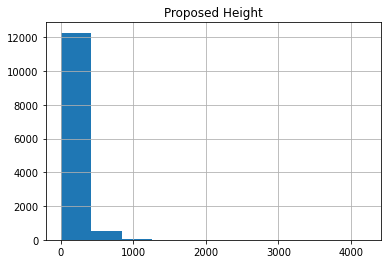

In [20]:
import matplotlib.pyplot as plt
df.hist('Proposed Height')

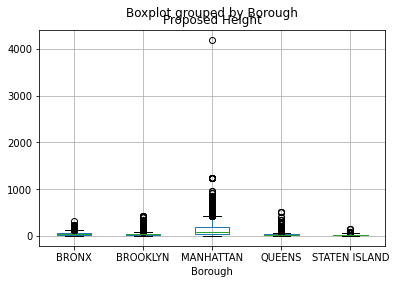

In [21]:
df.boxplot('Proposed Height', by='Borough')

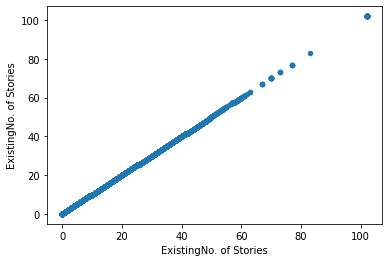

In [22]:
df.plot('ExistingNo. of Stories','ExistingNo. of Stories',kind='scatter')

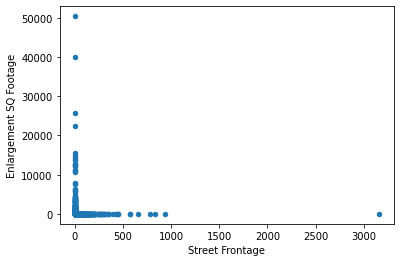

In [23]:
df.plot('Street Frontage','Enlargement SQ Footage',kind='scatter')

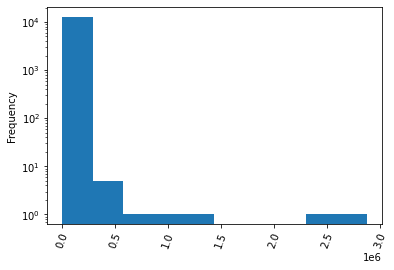

In [24]:
df['Existing Zoning Sqft'].plot(kind='hist',rot=70, logy=True)

#### Converting Object Column to Numeric

In [0]:
# rename column so we can use dot notation
df.rename(columns={'Initial Cost':'Initial_Cost'},inplace=True)

In [0]:
# set column equal to a column composed of float values
df['Initial_Cost'] = df.Initial_Cost.str.replace('$','').astype(float)

In [27]:
# check to see that the values changes
df.Initial_Cost

0         75000.0
1             0.0
2         30000.0
3          1500.0
4         19500.0
           ...   
12841     30700.0
12842     62000.0
12843    166000.0
12844     65000.0
12845      9500.0
Name: Initial_Cost, Length: 12846, dtype: float64

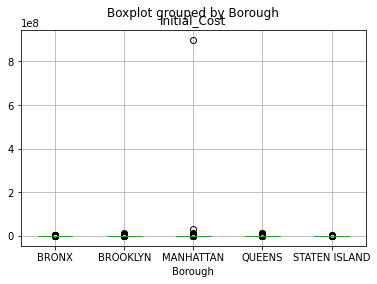

In [28]:
# Use column in boxplot
df.boxplot('Initial_Cost', by='Borough')

# Tidying Data for Analysis

### Tidy Data

In [29]:
"""Tidy Data: columns represent variables, rows represent observations/data points, observational units for tables.
    Even though tidy data can be harder to read, it's better for analysis."""


"Tidy Data: columns represent variables, rows represent observations/data points, observational units for tables.\n    Even though tidy data can be harder to read, it's better for analysis."

In [30]:
df = pd.read_csv('airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [31]:
df['Date']= df['Month'].astype(str)+'/'+df['Day'].astype(str) + '/' + '2012'
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Ozone','Solar.R','Wind','Temp','Date']]
df.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41.0,190.0,7.4,67,2012-05-01
1,36.0,118.0,8.0,72,2012-05-02
2,12.0,149.0,12.6,74,2012-05-03
3,18.0,313.0,11.5,62,2012-05-04
4,NaN,NaN,14.3,56,2012-05-05


In [32]:
'''pd.melt() addresses when you want column values to be variables...?'''
air_quality_melt = pd.melt(frame=df, id_vars='Date')
air_quality_melt.head()

,Date,variable,value
0,2012-05-01,Ozone,41.0
1,2012-05-02,Ozone,36.0
2,2012-05-03,Ozone,12.0
3,2012-05-04,Ozone,18.0
4,2012-05-05,Ozone,NaN


In [33]:
air_quality_melt.tail()

,Date,variable,value
607,2012-09-26,Temp,70.0
608,2012-09-27,Temp,77.0
609,2012-09-28,Temp,75.0
610,2012-09-29,Temp,76.0
611,2012-09-30,Temp,68.0


In [34]:
air_quality_melt = pd.melt(frame=df, id_vars='Date',var_name='Measurement',value_name='Reading')
air_quality_melt.head()

,Date,Measurement,Reading
0,2012-05-01,Ozone,41.0
1,2012-05-02,Ozone,36.0
2,2012-05-03,Ozone,12.0
3,2012-05-04,Ozone,18.0
4,2012-05-05,Ozone,NaN


### Pivoting Data

In [35]:
'''Reverse of Melt-back to report friendly shape'''
# ValueError's will arise when there are duplicate values in the column being pivot() pivoted because that would result in duplicate column names-use pivot_table() instead
# There is a parameter in pivot_table() that tells python how to aggregate duplicate values


'Reverse of Melt-back to report friendly shape'

In [36]:
import numpy as np
air_quality_pivot = air_quality_melt.pivot_table(index='Date',columns='Measurement',values='Reading') #,aggfunc=np.mean() error arises when aggfunc is entered and it isn't necessary
air_quality_pivot

Measurement,Ozone,Solar.R,Temp,Wind
Date,,,,
2012-05-01,41.0,190.0,67.0,7.4
2012-05-02,36.0,118.0,72.0,8.0
2012-05-03,12.0,149.0,74.0,12.6
2012-05-04,18.0,313.0,62.0,11.5
2012-05-05,NaN,NaN,56.0,14.3
...,...,...,...,...
2012-09-26,30.0,193.0,70.0,6.9
2012-09-27,NaN,145.0,77.0,13.2
2012-09-28,14.0,191.0,75.0,14.3


In [37]:
air_quality_pivot.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04',
               '2012-05-05', '2012-05-06', '2012-05-07', '2012-05-08',
               '2012-05-09', '2012-05-10',
               ...
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28',
               '2012-09-29', '2012-09-30'],
              dtype='datetime64[ns]', name='Date', length=153, freq=None)

In [38]:
air_quality_reset = air_quality_pivot.reset_index()
air_quality_reset.index

RangeIndex(start=0, stop=153, step=1)

In [39]:
air_quality_reset.head()

Measurement,Date,Ozone,Solar.R,Temp,Wind
0,2012-05-01,41.0,190.0,67.0,7.4
1,2012-05-02,36.0,118.0,72.0,8.0
2,2012-05-03,12.0,149.0,74.0,12.6
3,2012-05-04,18.0,313.0,62.0,11.5
4,2012-05-05,NaN,NaN,56.0,14.3


In [0]:
# Check shape of data to see make sure data hasn't been duplicated

### Beyond Melt and Pivot

In [41]:
df = pd.read_csv('tb.csv')
df.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [42]:
tb = df[['country','year','m014','m1524']]
tb.head()

,country,year,m014,m1524
0,AD,2000,0.0,0.0
1,AE,2000,2.0,4.0
2,AF,2000,52.0,228.0
3,AG,2000,0.0,0.0
4,AL,2000,2.0,19.0


In [43]:

tb_melt = pd.melt(frame=tb,id_vars=['country','year'])
tb_melt.head(2)

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0


In [44]:
tb_melt['gender'] = tb_melt.variable.str[0]
tb_melt['age_group'] = tb_melt.variable.str.replace('m','')
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


#### using str.split() and str.get()

In [45]:
'''split() and get()'''
df = pd.read_csv('ebola.csv')
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [46]:
df.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [47]:
df_melt = pd.melt(df, id_vars=['Date','Day'], var_name='type_country',value_name='counts')
df_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [48]:
df_melt['str_split'] = df_melt['type_country'].str.split('_')
df_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [49]:
df_melt['type'] = df_melt['str_split'].str.get(0)
df_melt.head(2)


,Date,Day,type_country,counts,str_split,type
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases


In [50]:
df_melt['country'] = df_melt['str_split'].str.get(1)
df_melt.head(2)

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea


In [51]:
ebola = df_melt[['Date','Day','counts','type','country']]
ebola.head()

,Date,Day,counts,type,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea


# Combining Data for Analysis

### Concatenating Data

In [0]:
# To reset index of two combined data frames pd.concat([df1,df2], ignore_index=True) use ignore_index= True
#axis=1 concatenates columns on the right

### Finding and concatenating data

In [53]:
'''glob() function helps with very large data sets'''
# wildcards = * word, ? single character

'glob() function helps with very large data sets'

In [54]:
import glob
csv_files = glob.glob('*.csv') # creates list of matching files in the current directory
csv_files

['nyc_uber_2014.csv',
 'tb.csv',
 'gapminder.csv',
 'airquality.csv',
 'tips.csv',
 'ebola.csv',
 'dob_job_application_filings_subset.csv']

In [55]:
list_of_data = []
for filename in csv_files:
  data = pd.read_csv(filename)
  list_of_data.append(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
pd.concat(list_of_data)

,Unnamed: 0,Date/Time,Lat,Lon,Base,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,...,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,0.0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4/1/2014 0:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,4/1/2014 0:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,4/1/2014 0:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4/1/2014 0:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,06/12/2013,NaN,NaN,NaN,$30700.00,$448.62,STANDARD,1490.0,1782.0,Y,NaN,206.0,0.0,1.0,1.0,10.0,10.0,1,1,J-3,J-3,ON-SITE,R1-2,NaN,NaN,SRD,NaN,NaN,NaN,GENO,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312.0,9.174686e+09,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,06/12/2013,NaN,NaN,NaN,$62000.00,$852.10,STANDARD,0.0,0.0,NaN,NaN,0.0,0.0,5.0,5.0,55.0,55.0,9,9,RES,RES,NOT APPLICABLE,R8,NaN,NaN,CL,NaN,NaN,NaN,STEVEN,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012.0,2.122289e+09,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Merging Data

In [57]:
'''merge--> like sql joins, joining on a common column'''
# pd.merge(left=df1,right=df2,on=None, or common column if present OTHERWISE-->, left_on='left common column name',right_name='right common column name')

'merge--> like sql joins, joining on a common column'

# Cleaning Data for Analysis

### Data

In [58]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [0]:
# '''When numerical numbers are passed in as strings:'''
# tb_melt['age_group'] = pd.to_numeric(tb_melt['age_group'],errors='coerce') #errors="coerce" forces non numeric values into NaNs

In [0]:
df.smoker = df.smoker.astype('category')

In [0]:
df.sex = df.sex.astype('category')


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


In [0]:
df['total_bill'] = pd.to_numeric(df['total_bill'],errors='coerce')
df['tip'] = pd.to_numeric(df['tip'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


### Using Regex to clean strings

In [0]:
# \d* any digit any number of times
#\$\d* escape $ " " " "
# \$\d*\.\d*  including decimal point . matches any one character
# \$\d*\.\d{2} specifies two digits after the decimal
# ^\$\d*\.\d{2}$ ^ means match at beginning and & means match at end.  This is so regex wont pull monetary values from text/strings.

In [67]:
import re
pattern = re.compile('^\$\d*\.\d{2}$') # creates pattern
result = pattern.match('$17.89')
bool(result) #way to check if what we are looking for fits out pattern

True

In [68]:
'''Using .compile() and .match()'''
phone = '555-555-5555'
pattern = re.compile('\d{3}.\d{3}.\d{4}') 
pattern2 = re.compile('\d{3}-\d{3}-\d{4}')
pattern3 = re.compile('\d{3}\.\d{3}\.\d{4}')
result = pattern.match(phone)
result2 = pattern2.match(phone)
result3 = pattern3.match(phone)
bool(result), bool(result2), bool(result3)

(True, True, False)

In [69]:
'''using .findall()'''
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')
matches

['10', '1']

In [70]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='^\$\d*\.\d{2}$', string='$123.45'))
print(pattern2)

True
True


### Using Functions to clean data

In [71]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
import numpy as np

def recode_gender(gender):
  if gender == 'Female':
    return 0
  elif gender == 'Male':
    return 1
  else:
    return np.nan  
#gender = tips['sex']
tips['recode'] = tips.sex.apply(recode_gender)     # note applying on a column directly
tips.head()  

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [73]:
tips['total_bill'] = '$' + tips['total_bill'].astype(str)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode
0,$16.99,1.01,Female,No,Sun,Dinner,2,0
1,$10.34,1.66,Male,No,Sun,Dinner,3,1
2,$21.01,3.50,Male,No,Sun,Dinner,3,1
3,$23.68,3.31,Male,No,Sun,Dinner,2,1
4,$24.59,3.61,Female,No,Sun,Dinner,4,0


In [74]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_bill.apply(lambda x: x.replace('$', ''))
# Print the head of tips
print(tips.head())


  total_bill   tip     sex smoker  ...    time size  recode  total_dollar_replace
0     $16.99  1.01  Female     No  ...  Dinner    2       0                 16.99
1     $10.34  1.66    Male     No  ...  Dinner    3       1                 10.34
2     $21.01  3.50    Male     No  ...  Dinner    3       1                 21.01
3     $23.68  3.31    Male     No  ...  Dinner    2       1                 23.68
4     $24.59  3.61  Female     No  ...  Dinner    4       0                 24.59

[5 rows x 9 columns]


In [75]:
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_bill.apply(lambda x: re.findall('\d+\.\d+', x)[0])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,total_dollar_replace,total_dollar_re
0,$16.99,1.01,Female,No,Sun,Dinner,2,0,16.99,16.99
1,$10.34,1.66,Male,No,Sun,Dinner,3,1,10.34,10.34
2,$21.01,3.50,Male,No,Sun,Dinner,3,1,21.01,21.01
3,$23.68,3.31,Male,No,Sun,Dinner,2,1,23.68,23.68
4,$24.59,3.61,Female,No,Sun,Dinner,4,0,24.59,24.59


### Duplicate and missing data

In [76]:
'''drop_duplicates()'''

'drop_duplicates()'

In [0]:
# leave as is, drop, or fill
# fillna() chosen value or statistical value

In [78]:
air = pd.read_csv('airquality.csv')
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [79]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [80]:
air.drop_duplicates()
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [81]:
ozone_mean = air['Ozone'].mean()
air['Ozone'] = air['Ozone'].fillna(ozone_mean,inplace=True)
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    0 non-null      object 
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.3+ KB


### Testing with Asserts

In [82]:
gap = pd.read_csv('gapminder.csv')
gap.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [83]:
assert gap['1836'].notnull().all()

AssertionError: ignored

In [84]:
gap.fillna(0,inplace=True)
gap.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Algeria


In [0]:
assert gap['1836'].notnull().all()

In [86]:
ebola = pd.read_csv('ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [87]:
assert ebola.notnull().all().all()

AssertionError: ignored

In [88]:
assert (ebola >=0).all().all()

TypeError: ignored

# Case Study

In [126]:
gap = pd.read_csv('gapminder.csv')
gap.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [0]:
# read in data, head, shape, info, columns, describe, value counts, hist/scatter/box/bar plot, functions --> apply() to row or column to clean, assert clean data, merge concat,

In [128]:
gap.shape

(780, 219)

In [129]:
afgh = gap.loc[1]
type(afgh)

pandas.core.series.Series

In [130]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [131]:
gap.columns

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)

In [132]:
gap.describe()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,780.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.00000,209.000000,209.000000,210.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,129.500000,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,31.521741,31.481891,31.472736,31.467214,31.516318,31.647413,31.627512,31.721542,31.574726,31.488607,31.560796,31.620597,31.722090,31.770647,31.709005,31.666816,31.597313,31.633582,31.577861,31.559950,31.640100,31.604776,31.569204,31.564328,31.551990,31.674428,31.640697,31.580647,31.641294,...,62.031089,62.420000,62.830297,63.220446,63.657772,64.083614,64.445644,64.814455,65.131683,65.545792,65.868069,66.144406,66.402475,66.784615,66.844663,67.026875,67.092500,67.006106,67.220000,67.412404,67.623541,67.762344,67.934880,68.077703,68.437943,68.653254,68.93555,69.184211,69.524019,69.850190,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,75.103138,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,3.821229,3.745395,3.842306,3.758389,3.810340,4.063246,4.046057,4.245205,4.542525,4.545624,4.453902,3.983287,4.205397,4.303869,4.144827,4.102705,4.020460,4.114650,3.936358,3.886279,3.996987,3.943266,3.952972,4.048878,3.874715,4.104158,4.075289,3.975973,4.001474,...,10.101591,9.966088,9.820317,9.579715,9.336773,9.182230,9.023134,8.970940,8.917492,8.791604,8.699797,8.638336,8.605859,8.542711,8.521308,8.575423,8.653851,9.409205,8.859096,8.985482,9.138496,9.255394,9.317722,9.586079,9.393088,9.437280,9.40794,9.351742,9.266814,9.102796,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,0.000000,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,23.390000,23.390000,23.000000,23.390000,23.390000,23.390000,23.390000,23.390000,5.500000,1.500000,6.500000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.000000,20.380000,23.390000,23.390000,23.390000,23.390000,23.390000,...,18.100000,19.550000,21.910000,28.160000,38.000000,42.930000,42.500000,39.460000,35.430000,41.390000,43.950000,44.400000,44.820000,45.200000,45.400000,45.300000,45.100000,13.200000,43.800000,44.300000,44.000000,45.300000,45.000000,37.600000,44.900000,45.100000,44.00000,43.000000,42.500000,43.100000,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,64.750000,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,28.950000,28.950000,28.950000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000

In [133]:
gap['Life expectancy'].value_counts()

Bolivia                   3
Venezuela                 3
Bosnia and Herzegovina    3
East Germany              3
Liberia                   3
                         ..
Lesotho                   3
Togo                      3
Cape Verde                3
Taiwan                    3
Egypt                     3
Name: Life expectancy, Length: 260, dtype: int64

In [134]:
df = gap.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
1800,NaN,28.21,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.8,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,28.2,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.01,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.84,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,28.19,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.89,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,28.18,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.93,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df.shape

(219, 780)

In [136]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,79.3,71.4,62.7,74.4,72,60.7,NaN,71.2,NaN,72.1,77.5,78.8,69.2,NaN,NaN,60.1,71.3,75.4,80.8,79.1,76.4,NaN,71.2,NaN,64.6,74.7,74.4,NaN,67.76,75,80.15,NaN,NaN,67.1,NaN,55.6,55.7,NaN,56
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.2,79.4,71.9,63.3,74.6,72.3,61.1,NaN,71.3,NaN,72.3,77.6,79.1,69.6,NaN,NaN,60.7,71.3,75.4,80.9,79.1,76.6,NaN,71.5,NaN,64.7,74.8,74.5,NaN,68.04,75.2,80.38,NaN,NaN,67.1,NaN,56.3,57,NaN,56.1
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.2,79.5,72.4,64.1,74.7,72.4,61.5,NaN,71.5,NaN,72.4,77.6,79.2,70,NaN,NaN,61.3,71.5,75.4,81,79.1,76.8,NaN,71.8,NaN,64.9,74.8,74.6,NaN,68.3,75.4,80.6,NaN,NaN,66,NaN,56.7,59.3,NaN,56.1
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.21,79.6,72.9,64.91,74.8,72.5,61.9,NaN,71.7,NaN,72.5,77.6,79.3,70.4,NaN,NaN,61.91,71.7,75.4,81.1,79.1,77,NaN,72.1,NaN,65.1,74.8,74.7,NaN,68.56,75.6,80.82,NaN,NaN,64.92,NaN,57.1,61.69,NaN,56.1
Life expectancy,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan


In [137]:
df.rename(columns=df.iloc[218], inplace=True)
df.head()

,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
1800,NaN,28.21,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.8,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,28.2,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.01,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.84,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,28.19,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.89,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,28.18,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.93,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df = df[1:]
df.head()

,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan
1800,NaN,28.21,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.8,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,28.2,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.01,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.84,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,28.19,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.89,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,28.18,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.02,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.93,29.2,31.5,35,28.75,39,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,NaN,28.17,NaN,35.4,28.82,NaN,NaN,26.98,NaN,33.54,33.2,34,34.42,34.05,34.4,29.17,35.18,30.3,25.5,32.12,36.2,40.03,26.5,31,NaN,28.8,33,35.1,33.6,32,NaN,29.2,35.98,29.2,31.5,35,28.75,39.01,33.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df = df[0:100]['Afghanistan']
df = df.iloc[:,[0]]
df

,Afghanistan
1800,28.21
1801,28.2
1802,28.19
1803,28.18
1804,28.17
...,...
1895,27.24
1896,27.23
1897,27.22
1898,27.21


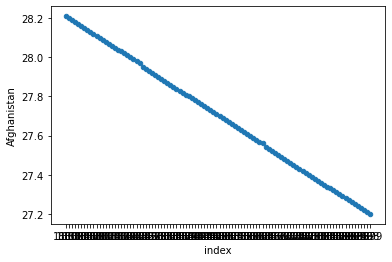

In [140]:
import matplotlib.pyplot as plt
df.reset_index().plot.scatter(x='index',y='Afghanistan')
plt.show()

In [302]:
'''Function for Cleaning Data'''
data = pd.read_csv('gapminder.csv')
#data.head(2)
data.shape

(780, 219)

In [303]:
data.set_index(data['Life expectancy'], inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
Life expectancy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.1,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.0,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.9,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,27.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan


In [304]:
data.drop(data.columns[217], axis=1, inplace=True)
data.reset_index(inplace=True)
data.head(2)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.1,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.0,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.9,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
data.shape

(780, 218)

In [306]:
data.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

In [0]:
def check_null_or_valid(row_data):
  no_na = row_data.dropna()
  numeric = pd.to_numeric(no_na, errors='coerce')
  ge0 = numeric >= 0
  return ge0

In [0]:
# Check whether the first column is 'Life expectancy'
assert data.columns[0] == 'Life expectancy'

In [309]:
data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Check whether the values in the row are valid
assert data.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [311]:
# Check that there is only one instance of each country
assert data['Life expectancy'].value_counts()[0] == 1

AssertionError: ignored

In [312]:
data['Life expectancy'].value_counts()

Bolivia                   3
Venezuela                 3
Bosnia and Herzegovina    3
East Germany              3
Liberia                   3
                         ..
Lesotho                   3
Togo                      3
Cape Verde                3
Taiwan                    3
Egypt                     3
Name: Life expectancy, Length: 260, dtype: int64

In [0]:
data.drop_duplicates(subset='Life expectancy', keep='first', inplace=True)

In [314]:
data['Life expectancy'].value_counts()

Bolivia         1
San Marino      1
East Germany    1
Liberia         1
Syria           1
               ..
Togo            1
Cape Verde      1
Taiwan          1
Tunisia         1
Egypt           1
Name: Life expectancy, Length: 260, dtype: int64

In [0]:
# Check that there is only one instance of each country
assert data['Life expectancy'].value_counts()[0] == 1

In [316]:
data.shape

(260, 218)

In [317]:
'''Concatenating dataframes columnwise:'''
# df = pd.concat([list of dfs],axis=1)

'Concatenating dataframes columnwise:'

### Initial Impressions of the Data

In [318]:
data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
bool(data.iloc[0].any() != 'NaN')

True

In [0]:
'''Melting Data'''
melt = pd.melt(data, id_vars='Life expectancy')
#melt.head()

In [321]:
melt.columns = ['country','year','life_expectancy']
melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [0]:
'''Checking Data Types'''
melt.year = pd.to_numeric(melt.year,errors='coerce')

In [0]:
assert melt.year.dtypes == np.int64

In [0]:
#assert type(melt.year) == np.int64 can't do it this way, i guess

In [0]:
assert melt.country.dtypes == np.object

In [0]:
assert melt.life_expectancy.dtypes == np.float64

In [327]:
countries = melt.country
countries.drop_duplicates()

0                   Abkhazia
1                Afghanistan
2      Akrotiri and Dhekelia
3                    Albania
4                    Algeria
               ...          
255               Yugoslavia
256                   Zambia
257                 Zimbabwe
258                    Åland
259              South Sudan
Name: country, Length: 260, dtype: object

In [0]:
pattern = '^[A-Za-z .]*$'

In [329]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49             Congo, Dem. Rep.
50                  Congo, Rep.
53                Cote d'Ivoire
73       Falkland Is (Malvinas)
93                Guinea-Bissau
                  ...          
56385               Timor-Leste
56411     Virgin Islands (U.S.)
56412      North Yemen (former)
56413      South Yemen (former)
56418                     Åland
Name: country, Length: 3906, dtype: object


In [0]:
'''Dealing with missing data'''
#, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column.

In [0]:
assert pd.notnull(melt.country).all()

In [0]:
assert pd.notnull(melt.year).all()

In [334]:
melt = melt.dropna(axis=0, how='any')
melt.shape

(20100, 3)

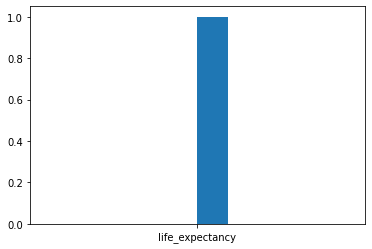

In [340]:
"""Histogram and Aggregation"""
plt.hist('life_expectancy',bins=10)
plt.show()

In [351]:
melt_agg = melt.groupby('year')['life_expectancy'].mean().reset_index()
melt_agg.columns = ['year','avg_life_expectancy']
melt_agg.head(), melt_agg.tail()

(   year  avg_life_expectancy
 0  1800            31.486020
 1  1801            31.448905
 2  1802            31.463483
 3  1803            31.377413
 4  1804            31.446318,     year  avg_life_expectancy
 95  1895            32.811841
 96  1896            32.895224
 97  1897            32.964279
 98  1898            32.994080
 99  1899            32.962985)

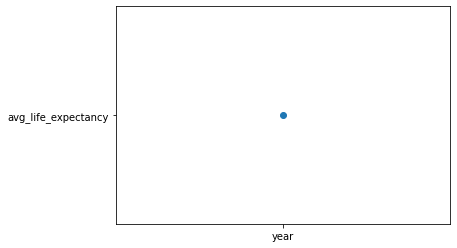

In [350]:
plt.scatter(x='year',y='avg_life_expectancy')
plt.show()

In [0]:
# # Forcing all dataframe values to numeric or NaN
# data.columns = pd.to_numeric(data.columns, errors='coerce')

In [0]:
# data.duplicated()

In [0]:
# data = data.drop_duplicates()
# data.shape

In [0]:
# import numpy as np

# def recode_gender(gender):
#   if gender == 'Female':
#     return 0
#   elif gender == 'Male':
#     return 1
#   else:
#     return np.nan  
# #gender = tips['sex']
# tips['recode'] = tips.sex.apply(recode_gender)     # note applying on a column directly
# tips.head() 